# Seaborn

Seaborn is a visualitzation library that sits on top of matplotlib, making it nicer to look at and adding some extra capabilities too.
Let's start by loafing up a real dataset on 2019 model-year vehicles, and plotting a histogram just using matplotlib to see the distribution by numbers of years


<AxesSubplot: >

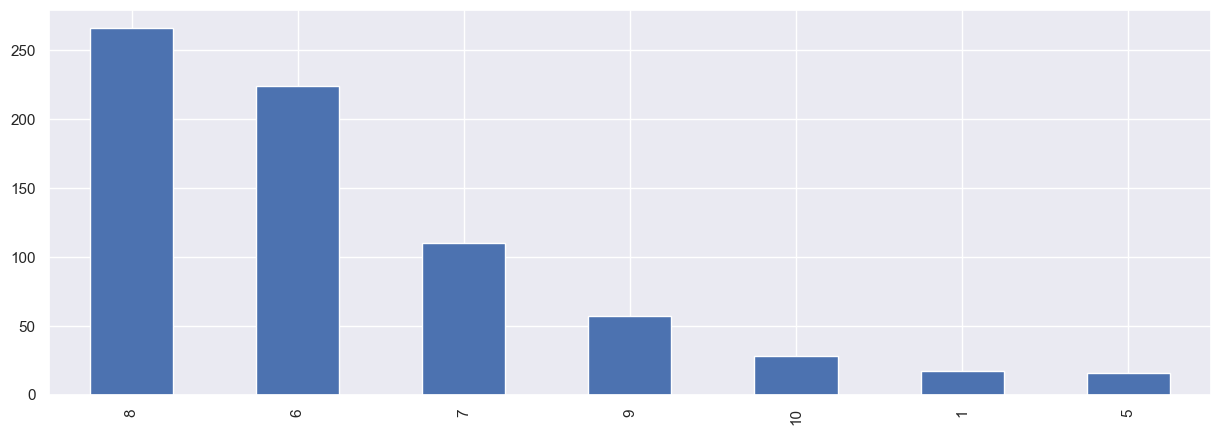

In [21]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('http://media.sundog-soft.com/SelfDriving/FuelEfficiency.csv')
gear_counts = df['# Gears'].value_counts()
gear_counts.plot(kind='bar')

We can load up Seaborn, and just call set() on it to change matploitlib's default settings to something more visually pleasing.

In [22]:
import seaborn as sns
sns.set()

Now if we do same plot command, it's a little more modern looking. Matplotlib is based on Matplot, and its visualization are frankly showing their age.

<AxesSubplot: >

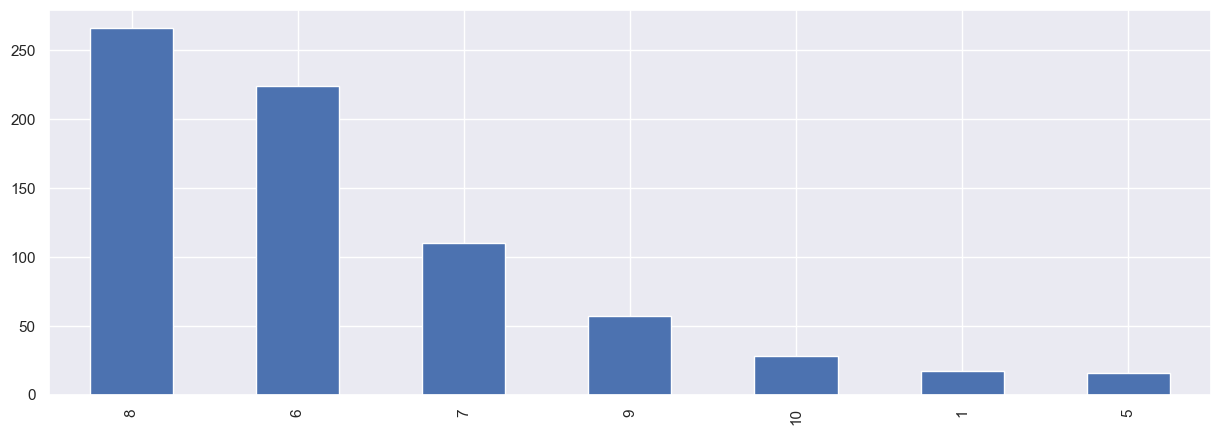

In [23]:
gear_counts.plot(kind='bar')

Let's take a closer look at the data we're dealing with

In [24]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


Seaborn  includes many types of plots that matploitlib doesn't. For example "displot" can be used to plot a histogram together with a smooth distribution of that histogram overloaid on it. Let's plot the distribution of MPG values on the vehicles in thos database as an example.

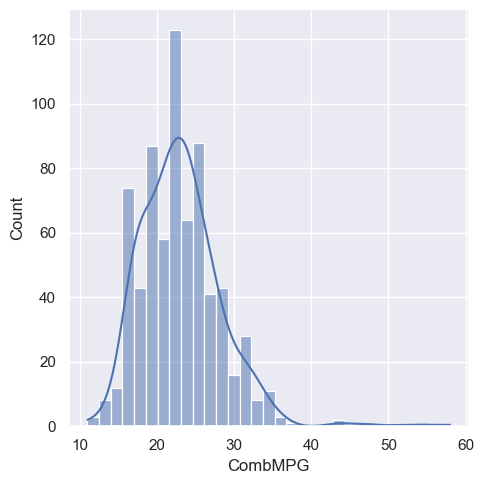

In [25]:
sns.displot(df['CombMPG'], kde=True)

Something you encounter pretty often is a "pair plot" from Seaborn. This lets you visualize plots of every combination of various attributes together, so you can look for interesting patterns between features.

As an example, let's classify cars by how many cylinders are in their engines, and look for relationships between cylinders, city MPG rating, Higway MPG rating, and combined MPG rating.

In [26]:
df2 = df[['Cylinders', 'CityMPG', 'HwyMPG', 'CombMPG']]
df2.head()

,Cylinders,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,16,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


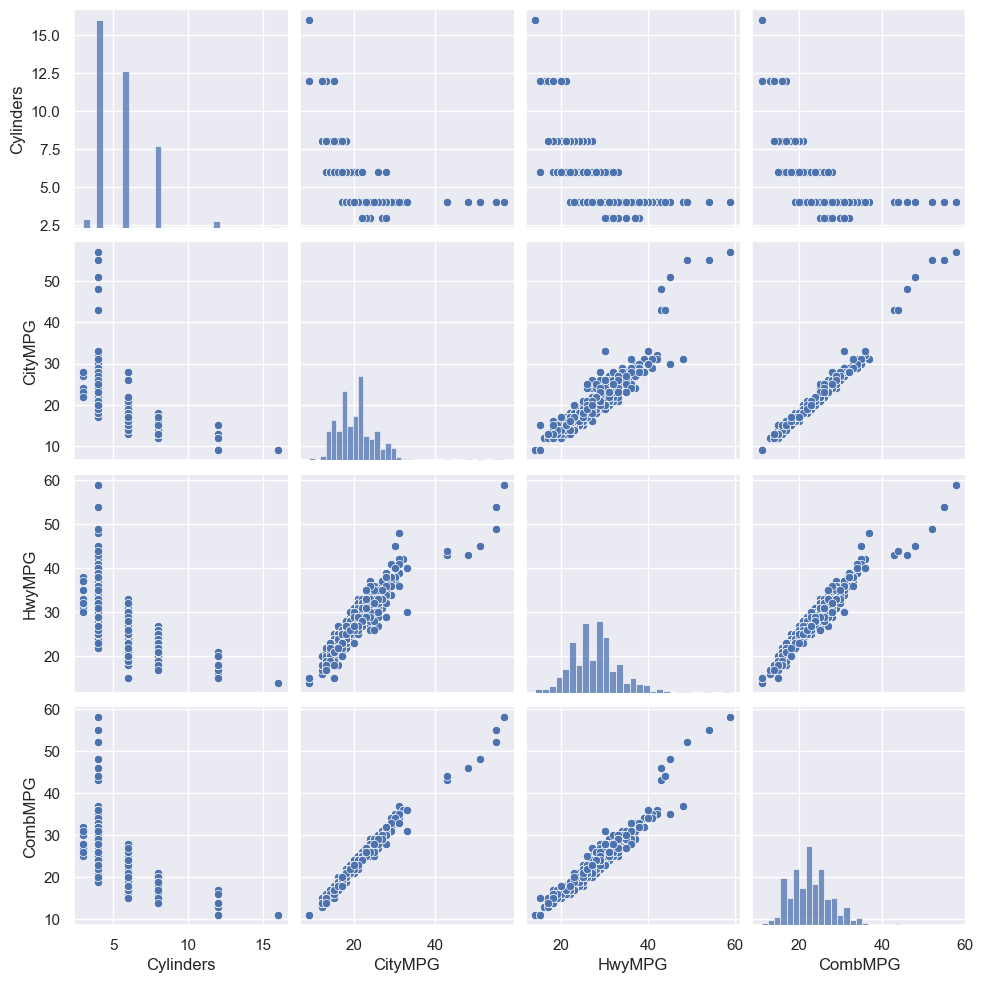

In [27]:
sns.pairplot(df2, height=2.5)

By studyng the results above, you can see there is a relationship between number of cylinders and MPG, but MPG for 4-cylinder vehicles ranges really widely. There also appears to be a good linear relationship between the different ways of measuring MPG values, until you get into the higher MPG ratings.

Seaborn 1.9 includes "scarplot", which is exactly what it sounds like. It plots individual data points across two axes of your choosing, so you can see how your data is distributed across those dimensions. 

<AxesSubplot: xlabel='Eng Displ', ylabel='CombMPG'>

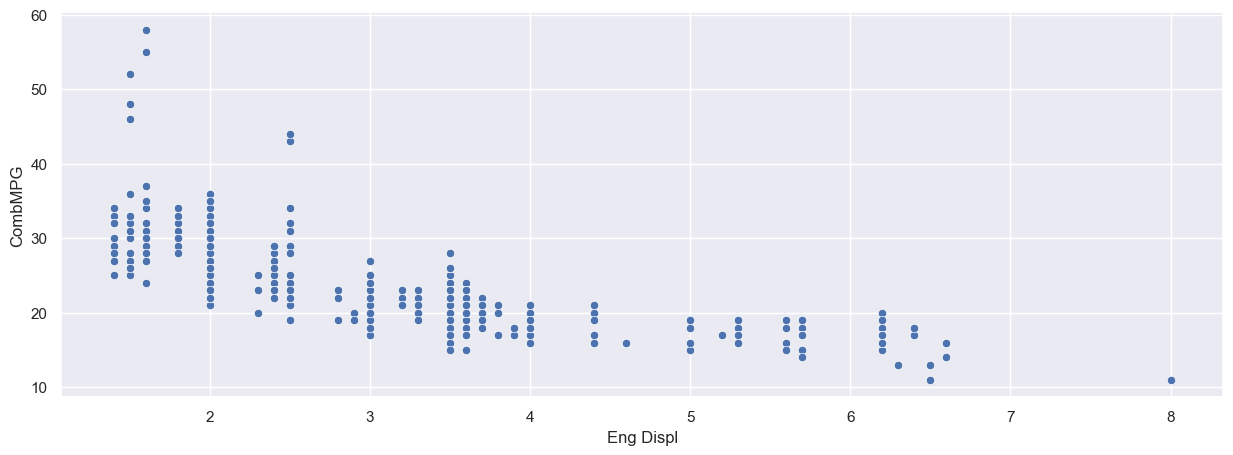

In [28]:
sns.scatterplot(x="Eng Displ", y="CombMPG", data=df)

Seaborn also offers a "jointplot", which combines a scatterplot with histograms on both axes. This lets tou visualize both the individual data points and the distribution across both dimensions at the same time:

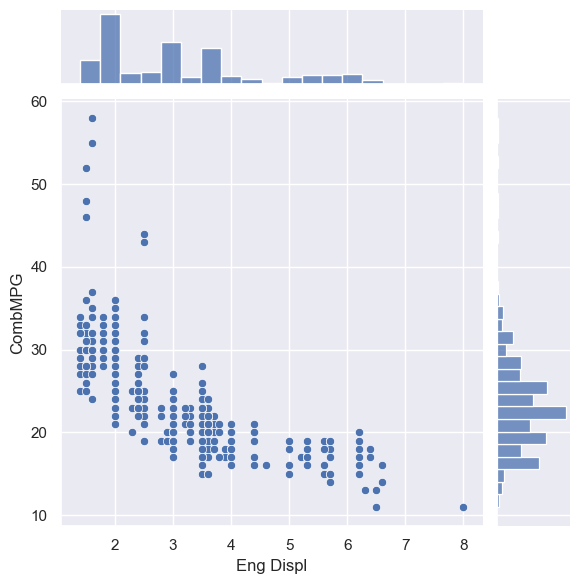

In [29]:
sns.jointplot(x="Eng Displ", y="CombMPG", data=df)

The "implot" is a scatterplot, but with a linear regression line computed and overlaid onto data.

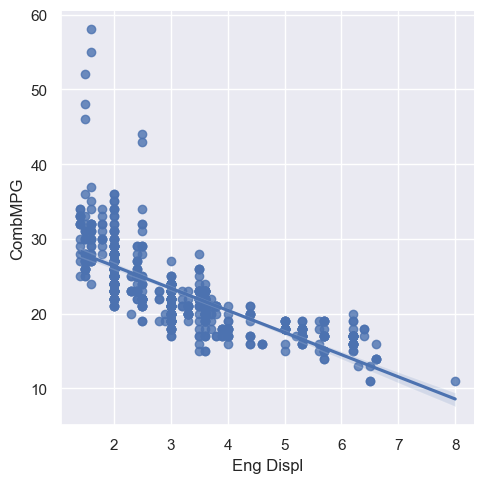

In [30]:
sns.lmplot(x="Eng Displ", y="CombMPG", data=df)

Next, let's look at a "box plot". This is what's called a "box and whiskers" plot, which is useful for visualizing typical values for a given category without getting distracted by outliers. Each box represents the range between the first and third quartiles of the data, with a line representing the median value. The "whiskers" that extend from the box represent the spread of the remainder of the data, apart from clear outliers that are plotted as individual points outside of the whiskers.

As an example, let's look at the box plots for each vehicle manufacturer, visualizing the miles-per-gallon ratings across the vehicles they produce. This lets us look at the spread of MPG ratings across all the vehicles each manufacturer offers.

There are a lot of manufacturers, so to make the resulting graph readable we'll increase Seaborn's default figure size, and also use set_xticklabels to rotate the labels 45 degrees.

/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_41820/87987496.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

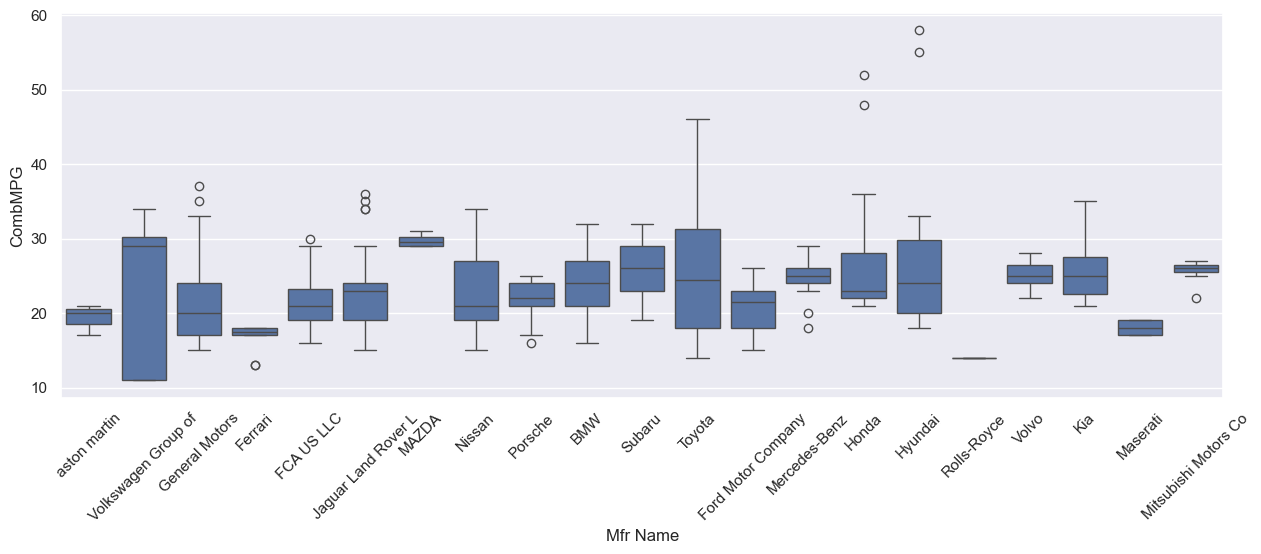

In [31]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Another way to visualize the same data is the "swarm plot". Instead of boxes and whiskers, it plots each individual data point - but does so in such way that groups the, together based on their distribution. It makes more sense when you look at it:

/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the 

[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the m

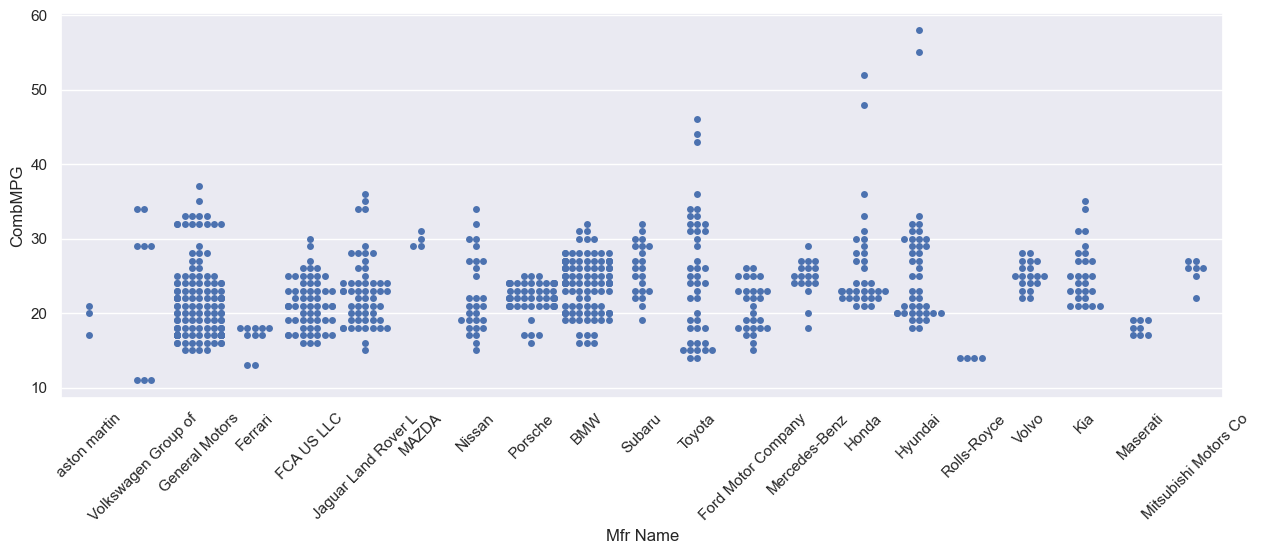

In [32]:
ax = sns.swarmplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Another tool is the "count plot". This is basically the same thing as a histogram, but for categorical data. It lets you count up many times each given category on te X axis occurs in your data, and plot it. So for example, we can see that General Motors offers more vehicle models than anyone else, with BMW not far behind.

/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_41820/877020993.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

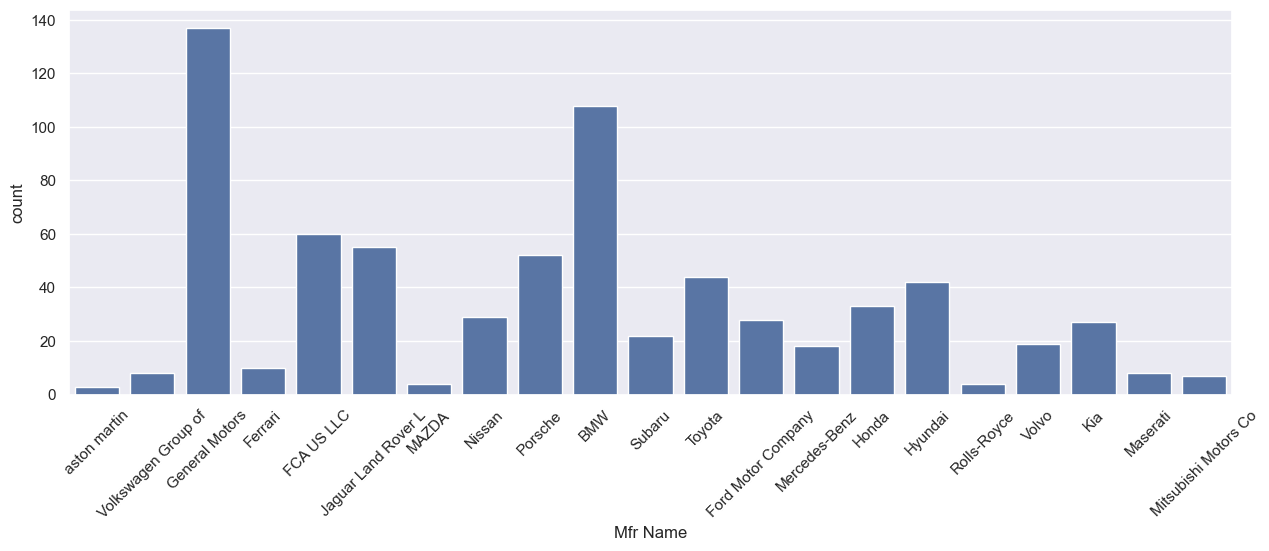

In [33]:
ax = sns.countplot(x="Mfr Name", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Finally let's look at a heat-map in Seaborn. A heat allows you to plot tabular, 2D data of some sort, with colors representing individual values in each cell of the 2D table.

In this example, we'll create a pivot table from our original dataframe, to create a 2D table that contains the average MPG ratings for every combination of number of cylinders and engine displacement.

The resulting heatmap shows all of the engine displacement values along the X axis, and all of the cylinder calues along the Y axis. For each cell of the table, the actual average MPG rating for that combination of cylinders and engine displacement is represented not as a number, but as a color that ranges from dark for small values, and light for larger values.

And, this does allow you visualize a clear trend where things get progressively darker as we move from the top-left of the grapht to the bottom-right. Wich make sense; higher MPG ratings are associated with lower numbers of cylinders, and lower engine displacement values.  By the time we get to an 8-liter 16-cylinder engine, the average MPG is at its worst of about 12, represented by the color black.

This particular graph has a lot of missing data, but the heatmap deals with trhe gracefully. A 3-cylinder 8-liter engine simply does not exist !

<AxesSubplot: xlabel='Eng Displ', ylabel='Cylinders'>

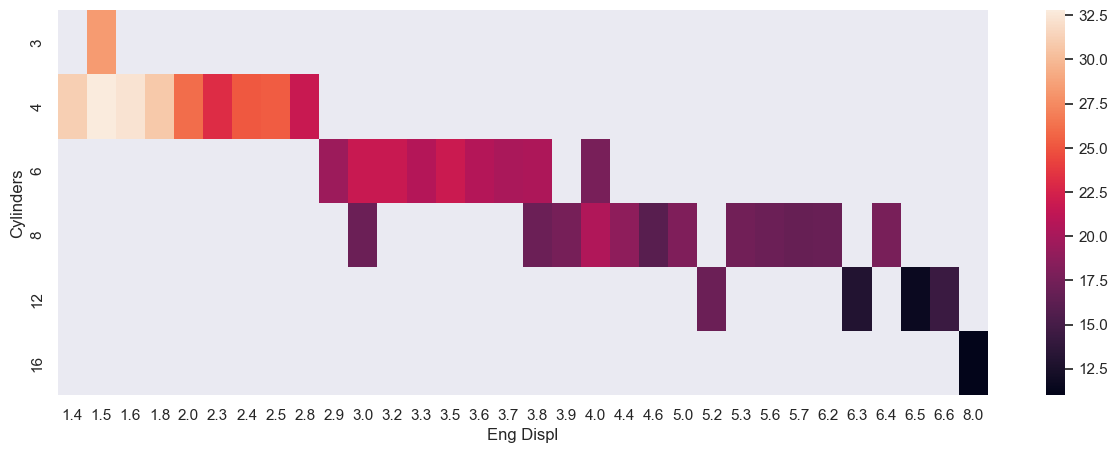

In [34]:
df2 = df.pivot_table(index='Cylinders', columns='Eng Displ', values='CombMPG', aggfunc='mean')
sns.heatmap(df2)

## Exercise
Explore the relationship between the numbers of gears a car has, and its combined MPG rating. Visualize these two dimensions using a scatter plot, implot, jointplot, boxplot and swarmplot. What conclusions can you draw?

In [35]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


<AxesSubplot: xlabel='# Gears', ylabel='CombMPG'>

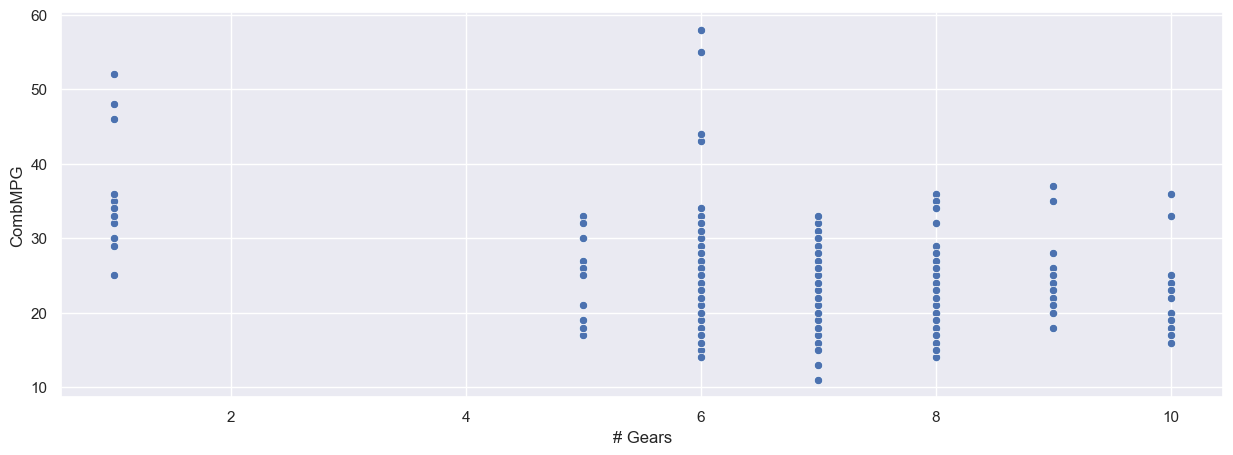

In [41]:
# scatter plot
sns.scatterplot(x="# Gears", y="CombMPG", data=df)

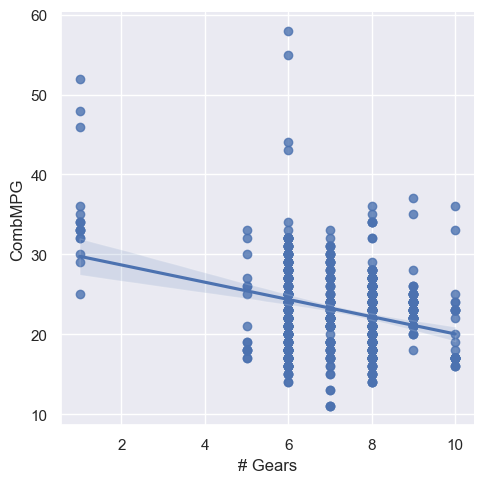

In [42]:
# implot
sns.lmplot(x="# Gears", y="CombMPG", data=df)

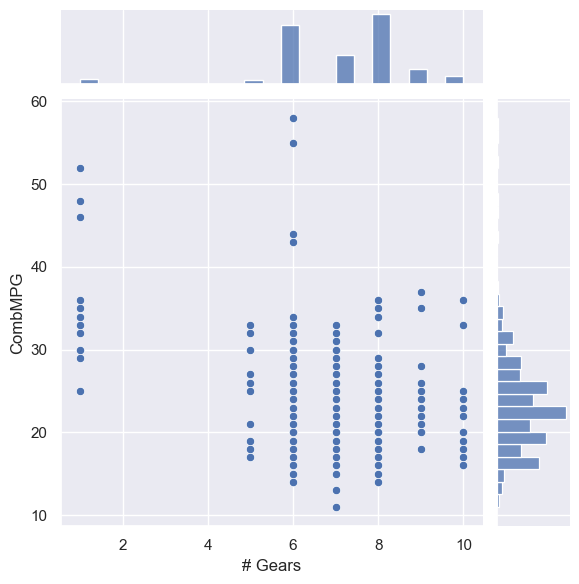

In [43]:
# jointplot
sns.jointplot(x="# Gears", y="CombMPG", data=df)

/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_41820/2762286043.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, '1'),
 Text(1, 0, '5'),
 Text(2, 0, '6'),
 Text(3, 0, '7'),
 Text(4, 0, '8'),
 Text(5, 0, '9'),
 Text(6, 0, '10')]

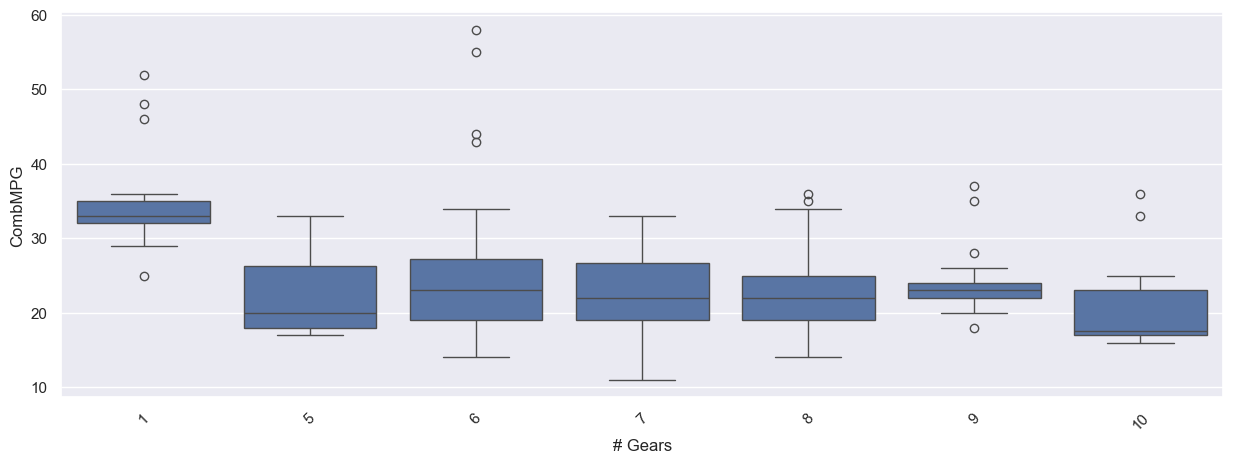

In [44]:
# boxplot
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='# Gears', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels())

/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_41820/3069867063.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


[Text(0, 0, '1'),
 Text(1, 0, '5'),
 Text(2, 0, '6'),
 Text(3, 0, '7'),
 Text(4, 0, '8'),
 Text(5, 0, '9'),
 Text(6, 0, '10')]

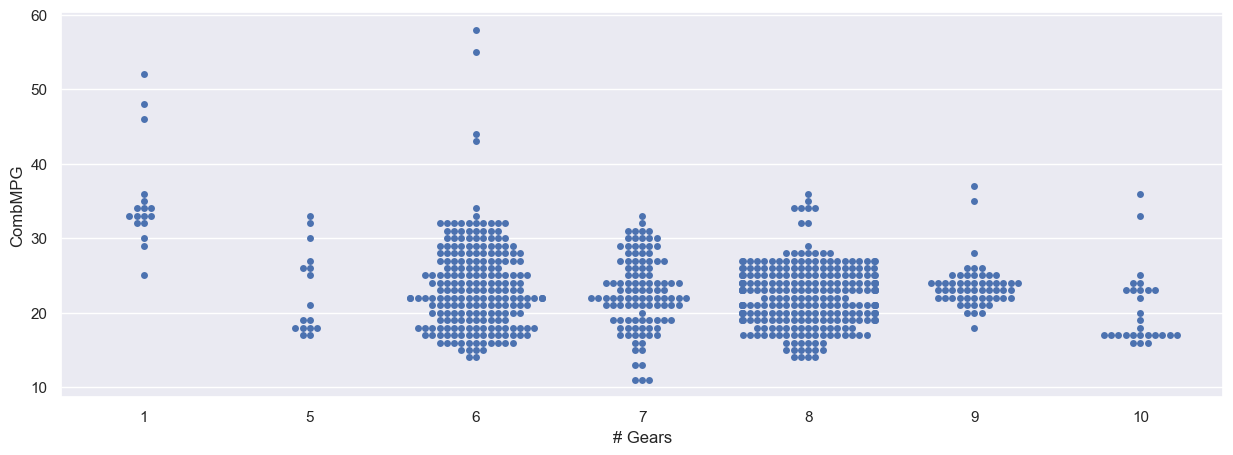

In [46]:
# Swarmplot
ax = sns.swarmplot(x='# Gears', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels())